## Author: Anirudh Shaktawat

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'ug201311005'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('5Files/' + filenameToRead)
train = training_df.drop('Unnamed: 0', axis=1)

filenameToRead1 = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv('5Files/' + filenameToRead1)
test = testing_df.drop(['Unnamed: 0', 'Class'], axis=1)

In [60]:
y = train['Class']
x = train.drop('Class', axis=1)

## Grid Search for SVM (Tuning the SVM model with hyper-parameters)
There are 3 important parameters when it comes to tuning with svm - C, kernel, and gamma.

C represents the penalty parameter, larger the value of C, the more we are penalising the violations/misclassifications. So, there is a tradeoff with respect to C, the larger we make C, the smaller will the margin be but we will be getting more of the training data correct. So, if we make C very large to get most of the training data correct, then we may compromise with the generalisation property (robustness) of the model. In some cases, even when the data is truly linearly separable, we would like to tradeoff a small C for greater margins to make our model robust, especially in case of noisy data.

When our data is not linear in the given dimensions, then to make our classifier more powerful, we do basis transformation. Kernel trick does the same thing for us, it takes the data in the given dimensions and transform it to some higher dimensions to make it linear and then applies a linear classification. This facility is provided by the kernel parameter in the SVM algorithm.

Gamma is a parameter which is associated with rbf or poly kernel and deals with the measure of complexity of the model. Small gamma means less complexity and large gamma means more complexity and very large gamma may eventually lead to overfitting.

In [61]:
from sklearn import svm
from sklearn.model_selection import cross_validate, GridSearchCV
from mlxtend.plotting import plot_decision_regions
classifier = svm.SVC()

### Although we can apply grid search on kernel hyper-parameter during tuning, it is better if we apply grid search for each kernel independently. It would help us in better visualisation of the decision boundaries since we have only 200 datapoints 

## 1) SVM model with the default settings without any hyper-parameter tuning:

In [62]:
base_results = cross_validate(classifier, x, y, cv  = 3, return_train_score=True)
classifier.fit(x, y)
accuracy = classifier.score(x,y)
print('Training Accuracy:',accuracy)
cv_score = (base_results['test_score'].mean())
print('CV score:', cv_score)

Training Accuracy: 0.775
CV score: 0.7851650836725463


Text(0.5,1,'SVM Decision Region Boundary')

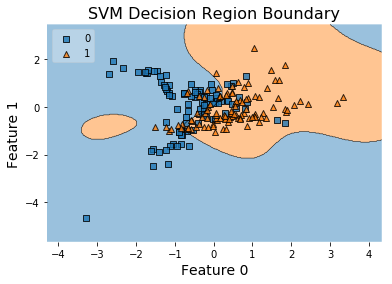

In [63]:
clf = svm.SVC()
clf.fit(x,y)
plot_decision_regions(X=x.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)
plt.xlabel(x.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

## 2) SVM model with linear kernel with hyperparameter tuning:

In [64]:
param_grid = {'C':[0.001, 0.01, 0.5,1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4],  # penalty parameter C of the error term
              'kernel':['linear'], # specifies the kernel type to be used in the algorithm  
              #'degree':[2,3,4,5], # only for poly kernel 
              'gamma':[0.001, 0.02, 0.08,0.2,0.5, 0.8, 1.0, 1.2] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'accuracy', cv = 3, return_train_score=True)
tune_model.fit(x, y)

print('AFTER Tuning Parameters: ', tune_model.best_params_)
accuracy = tune_model.cv_results_['mean_train_score'][tune_model.best_index_]
cv_score = tune_model.cv_results_['mean_test_score'][tune_model.best_index_]
print('Training Accuracy:', accuracy)
print('CV Score:', cv_score)

AFTER Tuning Parameters:  {'C': 2.5, 'gamma': 0.001, 'kernel': 'linear'}
Training Accuracy: 0.7599970074439831
CV Score: 0.75


Text(0.5,1,'SVM Decision Region Boundary')

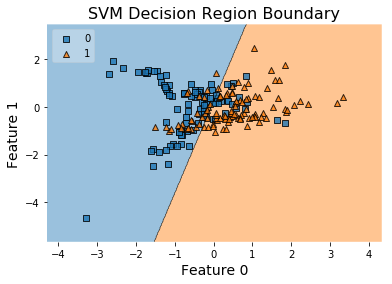

In [65]:
clf = svm.SVC(C=2.5, gamma = 0.001, kernel='linear')
clf.fit(x,y)
plot_decision_regions(X=x.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)
plt.xlabel(x.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

## 3) SVM model with poly kernel with hyperparameter tuning:

In [66]:
param_grid = {'C':[0.001, 0.01, 0.5,1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4],  # penalty parameter C of the error term
              'kernel':['poly'], # specifies the kernel type to be used in the algorithm  
              'degree':[2,3,4,5], # only for poly kernel 
              'gamma':[0.001, 0.02, 0.08,0.2,0.5, 0.8, 1.0, 1.2] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'accuracy', cv = 3, return_train_score=True)
tune_model.fit(x, y)

print('AFTER Tuning Parameters: ', tune_model.best_params_)
accuracy = tune_model.cv_results_['mean_train_score'][tune_model.best_index_]
cv_score = tune_model.cv_results_['mean_test_score'][tune_model.best_index_]
print('Training Accuracy:', accuracy)
print('CV Score:', cv_score)

AFTER Tuning Parameters:  {'C': 4, 'degree': 3, 'gamma': 1.2, 'kernel': 'poly'}
Training Accuracy: 0.7199341637676281
CV Score: 0.72


Text(0.5,1,'SVM Decision Region Boundary')

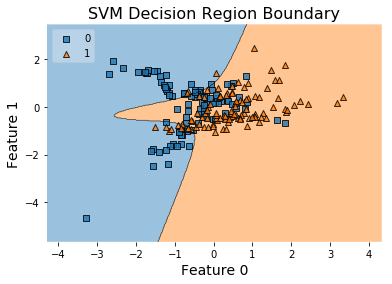

In [67]:
clf = svm.SVC(C=4, gamma = 1.2, degree=3, kernel='poly')
clf.fit(x,y)
plot_decision_regions(X=x.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)
plt.xlabel(x.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

## 4) SVM model with radial kernel with hyperparameter tuning:

In [68]:
param_grid = {'C':[0.001, 0.01, 0.5,1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4],  # penalty parameter C of the error term
              'kernel':['rbf'], # specifies the kernel type to be used in the algorithm  
              #'degree':[2,3,4,5], # only for poly kernel 
              'gamma':[0.001, 0.02, 0.08,0.2,0.5, 0.8, 1.0, 1.2] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'accuracy', cv = 3, return_train_score=True)
tune_model.fit(x, y)

print('AFTER Tuning Parameters: ', tune_model.best_params_)
accuracy = tune_model.cv_results_['mean_train_score'][tune_model.best_index_]
cv_score = tune_model.cv_results_['mean_test_score'][tune_model.best_index_]
print('Training Accuracy:', accuracy)
print('CV Score:', cv_score)

AFTER Tuning Parameters:  {'C': 3.0, 'gamma': 1.2, 'kernel': 'rbf'}
Training Accuracy: 0.8225601316724648
CV Score: 0.795


Text(0.5,1,'SVM Decision Region Boundary')

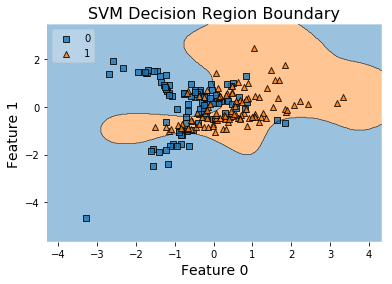

In [69]:
clf = svm.SVC(C=3, gamma = 1.2, kernel='rbf')
clf.fit(x,y)
plot_decision_regions(X=x.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)
plt.xlabel(x.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

## Decision Making (choosing the right model)
From all the above models, SVM model with the default settings (default kernel = rbf) and tuned SVM model with rbf kernel are giving the highest accuracy of around 78-80% as compared to models with linear and poly kernel which have accuracy of around 75% and 72% respectively. So it is clear that for the given data, rbf kernel is appropriate. 

Now, the difference between the accuracy of the default rbf kernel SVM model and the tuned rbf SVM model is not very significant. But the tuned SVM model has more complex boundaries since it has higher values of C and gamma. So, there is a danger for this model that this model might lead to overfitting and it might not generalise well on the testing data.

So, due to the danger of overfitting, we will choose the rbf kernel SVM model with the default settings (C=1, gamma = auto)

## Predictions on the testing data 

In [71]:
clf = svm.SVC()
clf.fit(x,y)
labels = clf.predict(test)
test.insert(0, 'Class', labels)

In [75]:
test.to_csv(filenameToRead1)